<h1><center>Motivation</center></h1>

<p>In this project, we want to study relations bettwen two products in a specific dataset. The whole porpuse of this project is to understand how a market basket analysis works and how we can implement an apriori algorithm in order to find strong relations bettwen supermarket products, which is very helpfull if we are trying to understand customer's behaviour in a store. For that, we are going to split this arquive in the following parts:</p>

<ol>
    <li>Importing libraries;</li>
    <li>Reading the dataset;</li>
    <li>Analysing the dataset:
        <ol>
            <li>Splitting date into new format;</li>
            <li>Droping some columns;</li>
            <li>Analysing "Quantity" column;</li>
        </ol>
    </li>
    <li>Encoding dataset;</li>
    <li>Fiding relations;</li>
</ol>

<h2>1. Importing libraries:</h2>

In [65]:
import pandas as pd

import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder 

<h2>2. Reading the dataset:</h2>

In [66]:
dataset = pd.read_csv("./dataset/products.csv", on_bad_lines='skip', sep=';')

print(dataset.shape)
dataset.head()

(522064, 7)


C:\Users\tulio\AppData\Local\Temp\ipykernel_16700\3911493612.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("./dataset/products.csv", on_bad_lines='skip', sep=';')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


<h2>3. Analysing the dataset:</h2>

<h3>3.1 Splitting date into new format:</h3>

<p>As we saw, Date column is not in dd-MM-yyyy format. Therefore, we are going to split this column into three new columns:</p>

<ul>
    <li>Day;</li>
    <li>Month;</li>
    <li>Year.</li>
</ul>

In [ ]:
dataset.loc[:, "Day"] = dataset["Date"].str.split(".").str[0].astype(int)
dataset.loc[:, "Month"] = dataset["Date"].str.split(".").str[1].astype(int)
dataset.loc[:, "Year"] = dataset["Date"].str.split(".").str[2].str.split(" ").str[0].astype(int)

print(dataset.shape)
dataset.head()

(522064, 9)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Day,Month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom,1,12
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom,1,12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom,1,12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom,1,12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom,1,12


<h3>3.2 Droping some columns;</h3>

In [ ]:
#Here, we see that there are some columns with empty values
#Also, some columns, for this analysis, are useless, such as CustomerID, Country and Date.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
 7   Day         522064 non-null  int32  
 8   Month       522064 non-null  int32  
 9   Year        522064 non-null  int32  
dtypes: float64(1), int32(3), int64(1), object(5)
memory usage: 33.9+ MB


In [ ]:
#Therefore, we are going to drop columns CustomerID and Date
dataset.drop(
    columns = ["CustomerID", "Date"],
    axis = 1,
    inplace = True,
)

print(dataset.shape)
dataset.head()

(522064, 8)


,BillNo,Itemname,Quantity,Price,Country,Day,Month,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,"2,55",United Kingdom,1,12,2010
1,536365,WHITE METAL LANTERN,6,"3,39",United Kingdom,1,12,2010
2,536365,CREAM CUPID HEARTS COAT HANGER,8,"2,75",United Kingdom,1,12,2010
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,"3,39",United Kingdom,1,12,2010
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,"3,39",United Kingdom,1,12,2010


In [ ]:
#We are also going to drop rows where Itemname is null. Thus...

#Colect all indexes where Itemname is null
null_index = dataset[dataset["Itemname"].isnull() == True].index

#Filter dataset by those indexes
dataset = dataset[~dataset.index.isin(null_index)]

print(f"Total rows droped: {len(null_index)}")
print(dataset.shape)
dataset.head()

Total rows droped: 1455
(520609, 8)


,BillNo,Itemname,Quantity,Price,Country,Day,Month,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,"2,55",United Kingdom,1,12,2010
1,536365,WHITE METAL LANTERN,6,"3,39",United Kingdom,1,12,2010
2,536365,CREAM CUPID HEARTS COAT HANGER,8,"2,75",United Kingdom,1,12,2010
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,"3,39",United Kingdom,1,12,2010
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,"3,39",United Kingdom,1,12,2010


<h3>3.3 Analysing "Quantity" column</h3>

<p>
    It is very common that some supermarkets sells their products in a large amount to other stores, and, since we are trying to understand customer behaviour, it does not make sense to store those values. Also, there is a risk of negative values in Quantity columns
</p> 

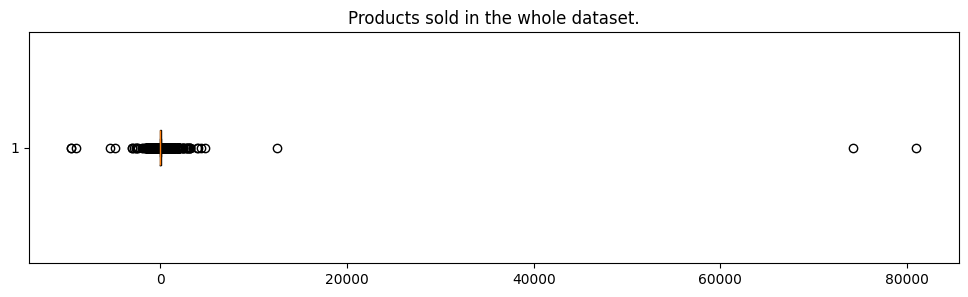

In [ ]:
fig, ax = plt.subplots(figsize = (12, 3))

ax.boxplot(dataset["Quantity"], vert=False)

plt.title("Products sold in the whole dataset.")
plt.show()


Total rows droped: 54710


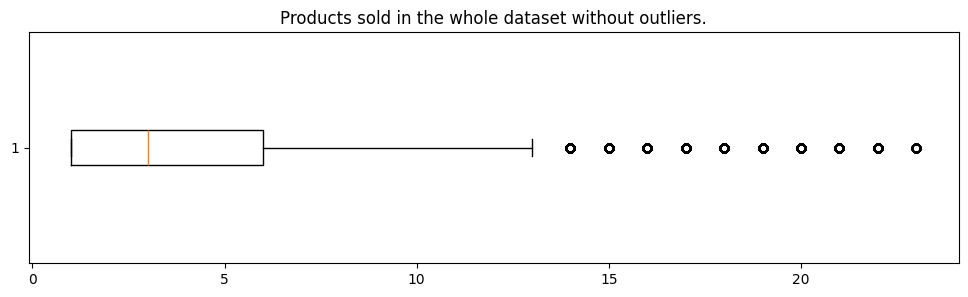

In [ ]:
rows_at_first = dataset.shape[0]

#Therefore, we are going to drop negative values from Quantity
dataset = dataset[dataset["Quantity"] > 0]

#We are also going to drop outliers from Quantity
q1 = dataset["Quantity"].quantile(0.25)
q3 = dataset["Quantity"].quantile(0.75)

gap = q3 - q1

dataset = dataset[
    (dataset["Quantity"] > q1 - 1.5*gap) &
    (dataset["Quantity"] < q3 + 1.5*gap)
]

print(f"Total rows droped: {rows_at_first - dataset.shape[0]}")

fig, ax = plt.subplots(figsize = (12, 3))

ax.boxplot(dataset["Quantity"], vert=False)

plt.title("Products sold in the whole dataset without outliers.")
plt.show()


<h2>4. Encoding dataset</h2>

In [ ]:
#Before we continue, let's analyse all products sold in France, for example
dataset = dataset[dataset["Country"] == "France"]

dataset.loc[:, "Itemname"] = dataset.loc[:, "Itemname"].str.strip().str.upper()

dataset

,BillNo,Itemname,Quantity,Price,Country,Day,Month,Year
28,536370,ALARM CLOCK BAKELIKE GREEN,12,"3,75",France,1,12,2010
29,536370,PANDA AND BUNNIES STICKER SHEET,12,"0,85",France,1,12,2010
33,536370,SET/2 RED RETROSPOT TEA TOWELS,18,"2,95",France,1,12,2010
38,536370,CHARLOTTE BAG DOLLY GIRL DESIGN,20,"0,85",France,1,12,2010
41,536370,VINTAGE SEASIDE JIGSAW PUZZLES,12,"3,75",France,1,12,2010
...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,"0,85",France,9,12,2011
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,"2,1",France,9,12,2011
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,"4,15",France,9,12,2011
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,"4,15",France,9,12,2011


In [ ]:
dummy_dataset = pd.DataFrame()

for bill in dataset["BillNo"].unique():

   header = dataset[dataset["BillNo"] == bill]["Itemname"].unique()    
   partdf = pd.DataFrame({bill: [1]*len(header)}, index = header).transpose()

   dummy_dataset = pd.concat([
       partdf, dummy_dataset
   ])

dummy_dataset = dummy_dataset.fillna(0)

dummy_dataset


,RABBIT NIGHT LIGHT,TOADSTOOL BEDSIDE LIGHT,FULL ENGLISH BREAKFAST PLATE,LUNCH BOX I LOVE LONDON,LONDON BUS COFFEE MUG,SET 2 TEA TOWELS I LOVE LONDON,QUEENS GUARD COFFEE MUG,MAGIC TREE -PAPER FLOWERS,PINK DOUGHNUT TRINKET POT,SMALL POPCORN HOLDER,...,VINTAGE BLUE TINSEL REEL,JARDIN ETCHED GLASS BUTTER DISH,GOLD PRINT PAPER BAG,"CAKESTAND, 3 TIER, LOVEHEART",GLASS BELL JAR SMALL,GLASS BELL JAR LARGE,PINK MARSHMALLOW SCARF KNITTING KIT,MIRRORED WALL ART FOXY,CHRISTMAS TREE T-LIGHT HOLDER,GIRLY PINK TOOL SET
553537,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553527,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>5. Finding relations</h2>

In [77]:
frq_items = apriori(dummy_dataset, min_support = 0.02, use_colnames = True)

frq_items

C:\Users\tulio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.039839,(LUNCH BOX I LOVE LONDON)
1,0.030429,(SET 2 TEA TOWELS I LOVE LONDON)
2,0.059880,(SMALL POPCORN HOLDER)
3,0.021141,(WORLD WAR 2 GLIDERS ASSTD DESIGNS)
4,0.040083,(RED TOADSTOOL LED NIGHT LIGHT)
...,...,...
312,0.027985,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY..."
313,0.021019,"(JUMBO STORAGE BAG SUKI, JUMBO BAG WOODLAND AN..."
314,0.031651,"(SET OF 6 SPICE TINS PANTRY DESIGN, SET OF 3 C..."
315,0.022119,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."


In [81]:
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items)
rules 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.034217,0.053648,0.027985,0.817857,15.244932,1.0,0.026149,5.195659,0.967510,0.467347,0.807532,0.669749
1,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",(GREEN REGENCY TEACUP AND SAUCER),0.027618,0.053648,0.022119,0.800885,14.928569,1.0,0.020637,4.752791,0.959514,0.373967,0.789597,0.606593
2,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.027985,0.053892,0.024685,0.882096,16.367783,1.0,0.023177,8.024396,0.965936,0.431624,0.875380,0.670073
3,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.026763,0.053648,0.024685,0.922374,17.193143,1.0,0.023250,12.191243,0.967737,0.442982,0.917974,0.691256
